In [ ]:
!cp '/content/drive/MyDrive/kaggle/kaggle.json' '/content'

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
import shutil
import pandas as pd

In [ ]:
import os

os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [ ]:
!kaggle datasets download -d cjinny/mura-v11

100% 3.14G/3.14G [00:17<00:00, 222MB/s]
100% 3.14G/3.14G [00:17<00:00, 190MB/s]


In [ ]:
!unzip "/content/mura-v11.zip" -d "/content/drive/MyDrive/"

In [ ]:
data_dir = r"/content/drive/MyDrive/MURA-v1.1/train/"
labels = ["XR_ELBOW", "XR_FINGER", "XR_FOREARM", "XR_HAND", "XR_HUMERUS", "XR_SHOULDER", "XR_WRIST"]

In [ ]:
train_paths_csv_path = "/content/drive/MyDrive/MURA-v1.1/train_image_paths.csv"
train_img_paths = pd.read_csv(train_paths_csv_path)
train_img_paths.columns = ['image_path']

In [ ]:
train_img_paths['category']  = train_img_paths['image_path'].apply(lambda x: x.split('/')[2])


In [ ]:
train_img_paths['image_name'] = train_img_paths['image_path'].apply(lambda x: x.split('/')[5])

In [ ]:
train_img_paths

,image_path,category,image_name
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,XR_SHOULDER,image2.png
1,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,XR_SHOULDER,image3.png
2,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,XR_SHOULDER,image1.png
3,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,XR_SHOULDER,image2.png
4,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,XR_SHOULDER,image3.png
...,...,...,...
36802,MURA-v1.1/train/XR_HAND/patient11183/study1_ne...,XR_HAND,image2.png
36803,MURA-v1.1/train/XR_HAND/patient11183/study1_ne...,XR_HAND,image3.png
36804,MURA-v1.1/train/XR_HAND/patient11184/study1_ne...,XR_HAND,image1.png
36805,MURA-v1.1/train/XR_HAND/patient11184/study1_ne...,XR_HAND,image2.png


In [ ]:
for img in range(len(train_img_paths)):
  img_path = os.path.join('/content/drive/MyDrive/', train_img_paths['image_path'][img])
  new_path = os.path.join(data_dir, train_img_paths['category'][img])
  new_img_path = os.path.join(new_path, "image"+ str(img) +".png")
  if os.path.exists(img_path):
    shutil.move(img_path, new_img_path)
  else:
    continue
  print(new_img_path)

In [ ]:
for label in labels:
  remove_dir = os.path.join(data_dir, label)
  for item in os.listdir(remove_dir):
    print(item)

In [ ]:
for label in labels:
  remove_dir = os.path.join(data_dir, label)
  for item in os.listdir(remove_dir):
     if item.endswith(".png"):
       continue
     else:
        shutil.rmtree(os.path.join(remove_dir, item), ignore_errors=True)

In [ ]:
val_data_dir = "/content/drive/MyDrive/MURA-v1.1/valid"
val_paths_csv_path = "/content/drive/MyDrive/MURA-v1.1/valid_image_paths.csv"
val_img_paths = pd.read_csv(val_paths_csv_path)
val_img_paths.columns = ['image_path']

In [ ]:
val_img_paths['category']  = val_img_paths['image_path'].apply(lambda x: x.split('/')[2])
val_img_paths['image_name'] = val_img_paths['image_path'].apply(lambda x: x.split('/')[5])
val_img_paths

,image_path,category,image_name
0,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,XR_WRIST,image2.png
1,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,XR_WRIST,image3.png
2,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,XR_WRIST,image4.png
3,MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...,XR_WRIST,image1.png
4,MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...,XR_WRIST,image2.png
...,...,...,...
3191,MURA-v1.1/valid/XR_FINGER/patient11967/study1_...,XR_FINGER,image3.png
3192,MURA-v1.1/valid/XR_FINGER/patient11967/study1_...,XR_FINGER,image4.png
3193,MURA-v1.1/valid/XR_FINGER/patient11738/study1_...,XR_FINGER,image1.png
3194,MURA-v1.1/valid/XR_FINGER/patient11738/study1_...,XR_FINGER,image2.png


In [ ]:
for img in range(len(val_img_paths)):
  val_img_path = os.path.join('/content/drive/MyDrive/', val_img_paths['image_path'][img])
  val_new_path = os.path.join(val_data_dir, val_img_paths['category'][img])
  val_new_img_path = os.path.join(val_new_path, "image"+ str(img) +".png")
  if os.path.exists(val_img_path):
    shutil.move(val_img_path, val_new_img_path)
  else:
    continue
  print(val_new_img_path)

In [ ]:
for label in labels:
  val_remove_dir = os.path.join(val_data_dir, label)
  for item in os.listdir(val_remove_dir):
    print(item)

In [ ]:
for label in labels:
  val_remove_dir = os.path.join(val_data_dir, label)
  for item in os.listdir(val_remove_dir):
     if item.endswith(".png"):
       continue
     else:
        shutil.rmtree(os.path.join(val_remove_dir, item), ignore_errors=True)

In [ ]:
import keras 
import tensorflow as tf
from tensorflow.keras import Model, layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, display
from glob import glob


from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [ ]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders
splitfolders.ratio('/content/drive/MyDrive/MURA-v1.1/train', output="/content/drive/MyDrive/MURA-v1.1/split", seed=1337, ratio=(.8, 0.2)) 

Copying files: 36807 files [07:34, 80.97 files/s] 


In [ ]:
"""!unzip "/content/drive/MyDrive/Dataset-Mura-20221227T133837Z-001.zip" -d "/content/drive/MyDrive/""""

Archive:  /content/drive/MyDrive/Dataset-Mura-20221227T133837Z-001.zip
replace /content/drive/MyDrive/Dataset-Mura/val/XR_HUMERUS/image9470.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
N


In [ ]:
IMAGE_SIZE=[256,256]
TRAIN_PATH = '/content/drive/MyDrive/MURA-v1.1/train'
TEST_PATH = '/content/drive/MyDrive/MURA-v1.1/test'
VALID_PATH = '/content/drive/MyDrive/MURA-v1.1/val'

In [ ]:
from tensorflow.keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
# Preprocessing the Training Set

from tensorflow.keras.preprocessing.image import  ImageDataGenerator
mean = [0.485, 0.456, 0.406] 
std = [0.229, 0.224, 0.225]

def standardize(image_data):
    image_data -= np.array(mean)
    image_data /= np.array(std)
    return image_data


train_datagen = ImageDataGenerator(dtype='float32',
                                   rescale=1.0/255.0,
                                   preprocessing_function=standardize,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   rotation_range=10, 
                                   vertical_flip=True,
                                   horizontal_flip=True
                                   )

train_generator = train_datagen.flow_from_directory(TRAIN_PATH,
                                                   shuffle=True,
                                                   target_size=(IMAGE_SIZE[0],IMAGE_SIZE[1]),
                                                   batch_size=32,
                                                   class_mode='categorical')

val_datagen = ImageDataGenerator( dtype='float32', 
                                  rescale=1.0/255.0,
                                  preprocessing_function=standardize
                                 )

val_generator = val_datagen.flow_from_directory(VALID_PATH,
                                                   shuffle=True,
                                                   target_size=(IMAGE_SIZE[0],IMAGE_SIZE[1]),
                                                   batch_size=32,
                                                   class_mode='categorical')



test_generator = val_datagen.flow_from_directory(TEST_PATH,
                                                   shuffle=False,
                                                   target_size=(IMAGE_SIZE[0],IMAGE_SIZE[1]),
                                                   batch_size=32,
                                                   class_mode='categorical')


Found 29442 images belonging to 7 classes.
Found 7365 images belonging to 7 classes.
Found 3196 images belonging to 7 classes.


In [ ]:
plot_datagen = ImageDataGenerator( dtype='float32', 
                                  rescale=1.0/255.0
                                 )

plot_generator = plot_datagen.flow_from_directory(TRAIN_PATH,
                                                   shuffle=True,
                                                   target_size=(IMAGE_SIZE[0],IMAGE_SIZE[1]),
                                                   batch_size=16,
                                                   class_mode='categorical')

Found 29442 images belonging to 7 classes.


(16, 256, 256, 3)


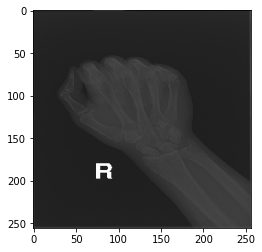

(16, 256, 256, 3)


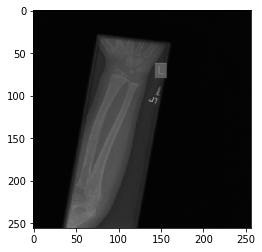

(16, 256, 256, 3)


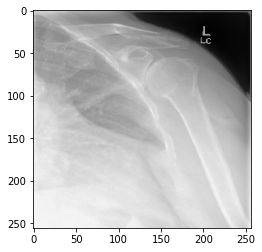

In [ ]:
for _ in range(3):
    img, label = plot_generator.next()
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

In [ ]:
val_generator.classes

array([0, 0, 0, ..., 6, 6, 6], dtype=int32)

In [ ]:
train_generator.classes

array([0, 0, 0, ..., 6, 6, 6], dtype=int32)

In [ ]:
test_generator.classes

array([0, 0, 0, ..., 6, 6, 6], dtype=int32)

In [ ]:
!pip install tensorflow-addons
import tensorflow_addons as tfa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 4.4 MB/s 


In [ ]:
model3 = Sequential()
model3.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation="relu", input_shape=(256, 256, 3)))
model3.add(Conv2D(filters=48, kernel_size=(5,5), padding='same', activation="relu"))
model3.add(MaxPool2D(strides=2))
model3.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation = "relu"))
model3.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation="relu"))
model3.add(MaxPool2D(strides=2))
model3.add(Flatten())
model3.add(Dense(256, activation="relu"))
model3.add(Dropout(0.5))
model3.add(Dense(84, activation="relu"))
model3.add(Dropout(0.5))
model3.add(Dense(42, activation="relu"))
model3.add(Dropout(0.5))
model3.add(Dense(7, activation='softmax'))
model3.compile(optimizer = "adam", loss = "binary_crossentropy",metrics=['accuracy',  tf.keras.metrics.AUC(),
                                                                         tfa.metrics.F1Score(name="macro_F1", num_classes=7, average='macro'),
                                                                         tfa.metrics.F1Score(name="micro_F1", num_classes=7, average='micro'), 
                                                                         f1_m, precision_m, recall_m ])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 256, 256, 32)      2432      
                                                                 
 conv2d_9 (Conv2D)           (None, 256, 256, 48)      38448     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 128, 128, 48)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 128, 128, 32)      38432     
                                                                 
 conv2d_11 (Conv2D)          (None, 128, 128, 32)      25632     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                  

In [ ]:
model_name_save= '/content/drive/MyDrive/forthModel.hdf5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(model_name_save, save_freq='epoch', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')  
early_stop = tf.keras.callbacks.EarlyStopping(  monitor='val_accuracy', patience=5, verbose=1,  mode='max',restore_best_weights=False)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(  monitor='val_accuracy', factor=0.1, patience=3,  min_lr=5e-5, verbose=1,  mode='max')

In [ ]:
history3 = model3.fit(train_generator, batch_size=16,validation_data=val_generator, epochs=15, callbacks=[checkpoint, early_stop],  shuffle=True, verbose = 1)

Epoch 1/15
921/921 [==============================] - ETA: 0s - loss: 0.3931 - accuracy: 0.3439 - auc_2: 0.7223 - macro_F1: 0.1906 - micro_F1: 0.3439 - f1_m: 0.2311 - precision_m: 0.5271 - recall_m: 0.1550
Epoch 1: val_accuracy improved from -inf to 0.47033, saving model to /content/drive/MyDrive/forthModel.hdf5
921/921 [==============================] - 683s 738ms/step - loss: 0.3931 - accuracy: 0.3439 - auc_2: 0.7223 - macro_F1: 0.1906 - micro_F1: 0.3439 - f1_m: 0.2311 - precision_m: 0.5271 - recall_m: 0.1550 - val_loss: 0.2947 - val_accuracy: 0.4703 - val_auc_2: 0.8429 - val_macro_F1: 0.2263 - val_micro_F1: 0.4703 - val_f1_m: 0.4564 - val_precision_m: 0.7295 - val_recall_m: 0.3365
Epoch 2/15
921/921 [==============================] - ETA: 0s - loss: 0.3032 - accuracy: 0.4996 - auc_2: 0.8382 - macro_F1: 0.2954 - micro_F1: 0.4996 - f1_m: 0.4643 - precision_m: 0.7152 - recall_m: 0.3491
Epoch 2: val_accuracy improved from 0.47033 to 0.56904, saving model to /content/drive/MyDrive/forthM

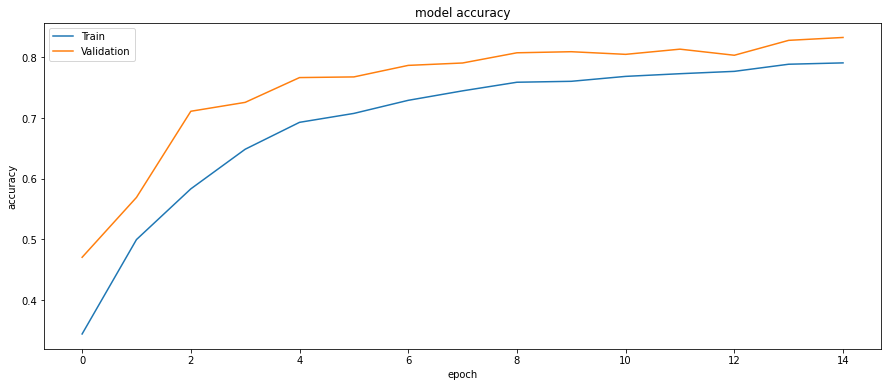

In [ ]:
# summarize history for accuracy

# FINAL MODEL

plt.figure(figsize=(15,6))
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

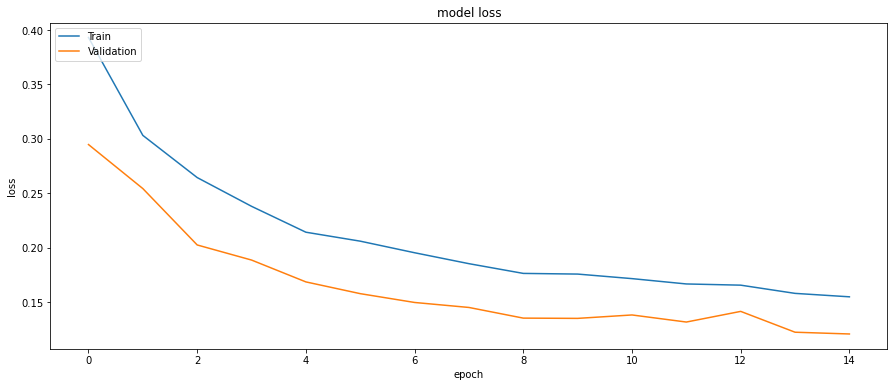

In [ ]:
# summarize history for loss
plt.figure(figsize=(15,6))
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
preds3 = model3.predict(test_generator)

100/100 [==============================] - 32s 321ms/step


In [ ]:
scores3 = model3.evaluate(test_generator)

100/100 [==============================] - 27s 273ms/step - loss: 0.1614 - accuracy: 0.7685 - auc_2: 0.9591 - macro_F1: 0.6773 - micro_F1: 0.7685 - f1_m: 0.7589 - precision_m: 0.8258 - recall_m: 0.7108


In [ ]:
from sklearn import metrics
import numpy as np
y_true3 = test_generator.classes
y_pred3 = np.argmax(preds3, axis=1)
matrix3 = metrics.confusion_matrix(y_true3, y_pred3)
matrix3

array([[360,   9,   0,  15,   9,  25,  47],
       [ 14, 397,   0,  26,   2,   8,  14],
       [153,  24,   0,  21,  38,  27,  38],
       [  9,  28,   0, 411,   0,   5,   7],
       [ 55,  11,   0,   9, 164,  47,   2],
       [ 15,   4,   0,   1,   4, 539,   0],
       [ 32,  20,   0,  14,   2,   5, 585]])

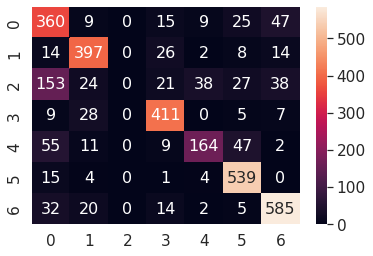

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm3 = pd.DataFrame(matrix3, range(7), range(7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm3, annot=True,fmt="g", annot_kws={"size": 16}) # font size

plt.show()

In [ ]:
files=test_generator.filenames
class_dict=test_generator.class_indices # a dictionary of the form class name: class index
rev_dict={}
for key, value in class_dict.items():
    rev_dict[value]=key

In [ ]:
for i, p in enumerate(preds3):
    index=np.argmax(p)
    klass=rev_dict[index]    
    prob=p[index]
    print('for file ', files[i], ' predicted class is ', klass,' with probability ',prob)

for file  XR_ELBOW/image2270.png  predicted class is  XR_HUMERUS  with probability  0.27435318
for file  XR_ELBOW/image2271.png  predicted class is  XR_WRIST  with probability  0.70223564
for file  XR_ELBOW/image2272.png  predicted class is  XR_SHOULDER  with probability  0.75633025
for file  XR_ELBOW/image2273.png  predicted class is  XR_ELBOW  with probability  0.9956067
for file  XR_ELBOW/image2274.png  predicted class is  XR_ELBOW  with probability  0.9995414
for file  XR_ELBOW/image2275.png  predicted class is  XR_ELBOW  with probability  0.8617569
for file  XR_ELBOW/image2276.png  predicted class is  XR_ELBOW  with probability  0.9999665
for file  XR_ELBOW/image2277.png  predicted class is  XR_ELBOW  with probability  0.946323
for file  XR_ELBOW/image2278.png  predicted class is  XR_ELBOW  with probability  0.9130098
for file  XR_ELBOW/image2279.png  predicted class is  XR_ELBOW  with probability  0.9672413
for file  XR_ELBOW/image2280.png  predicted class is  XR_ELBOW  with prob